# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#pprint(cities)

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
#url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=Paris"

#print(url)

#weather = requests.get(url, params={'units': 'metric',
                            #        'appid': weather_api_key,
                             #       })

#testing
#print(weather.url)

#testing how the JSON looks
#also have to adjust url to include params to see temp in metric, 
#otherwise temps show over 200.

#sol found from 
#https://stackoverflow.com/questions/64192319/openweathemap-api-saying-temperature-is-like-282

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

weather = requests.get(url, params={'units': 'metric',
                                    })


url = weather.url


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#this can take up to 10 min to run
#it will check all cities

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | astaneh-ye ashrafiyeh
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | panino
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | tazovsky
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | shihezi
Processing Record 15 of Set 1 | hebi
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | walvis bay
Processing Record 19 of Set 1 | adigrat
Processing Record 20 of Set 1 | zaporizhia
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | west island
Pro

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,7.73,71,100,4.12,US,1727404077
1,saipan,15.1355,145.7010,28.39,83,75,5.14,MP,1727404079
2,wailua homesteads,22.0669,-159.3780,28.44,70,20,5.14,US,1727404080
3,astaneh-ye ashrafiyeh,37.2596,49.9444,18.09,93,72,2.24,IR,1727404082
4,adamstown,-25.0660,-130.1015,21.56,89,85,4.37,PN,1727404083


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,7.73,71,100,4.12,US,1727404077
1,saipan,15.1355,145.7010,28.39,83,75,5.14,MP,1727404079
2,wailua homesteads,22.0669,-159.3780,28.44,70,20,5.14,US,1727404080
3,astaneh-ye ashrafiyeh,37.2596,49.9444,18.09,93,72,2.24,IR,1727404082
4,adamstown,-25.0660,-130.1015,21.56,89,85,4.37,PN,1727404083


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

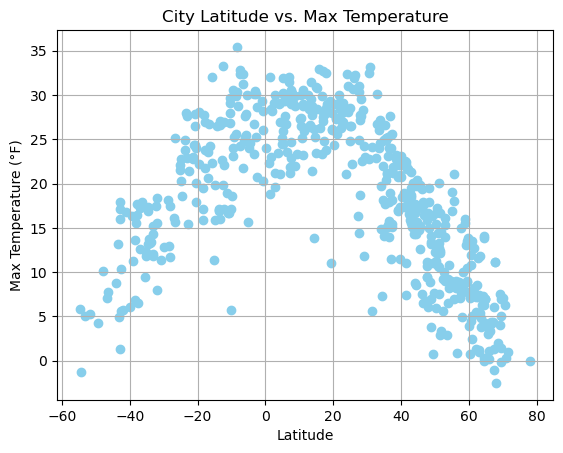

In [11]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", color='skyblue')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

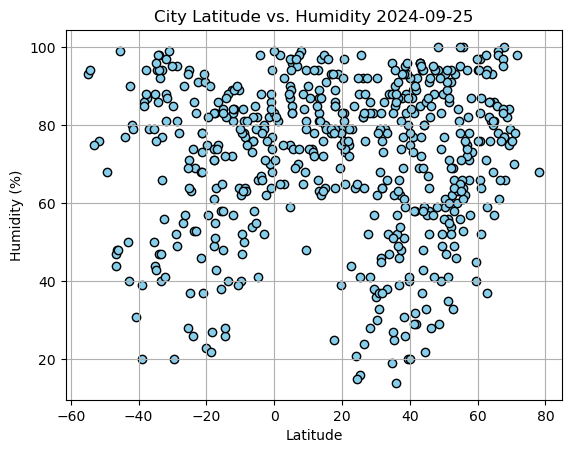

In [20]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", color='skyblue', edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity 2024-09-25")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

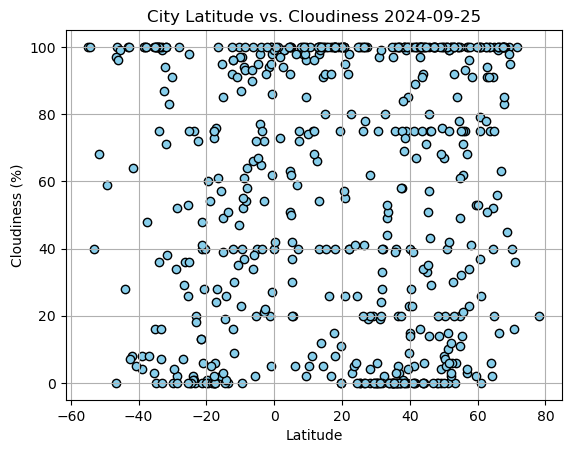

In [21]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", color='skyblue', edgecolor='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness 2024-09-25")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

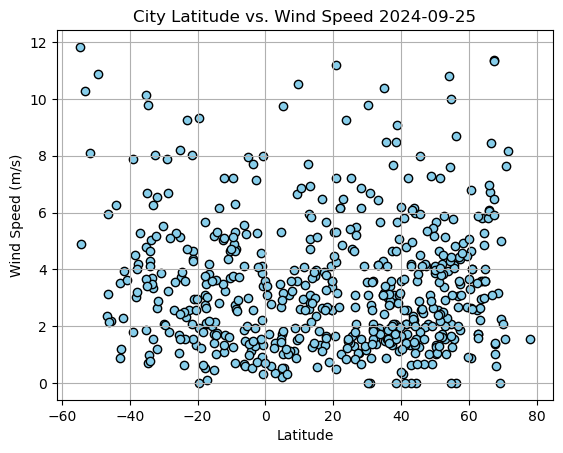

In [22]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", color='skyblue', edgecolor='black')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed 2024-09-25")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
x = city_data_df['Lat']
y = city_data_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

#adjust above code when needing different values
#????


In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
#northern_hemi_df = city_data_df["Lat"] >= 0 
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,utrik,11.2278,169.8474,301.60,74,8,2.94,MH,1727232107
4,ilulissat,69.2167,-51.1000,276.16,75,100,0.00,GL,1727232109
5,qaqortoq,60.7167,-46.0333,276.76,97,79,0.86,GL,1727232111
6,albany,42.6001,-73.9662,288.50,69,100,1.34,US,1727231843
7,yantarnyy,54.8717,19.9381,289.19,78,49,10.01,RU,1727232114


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,288.06,47,36,4.28,AU,1727232103
1,queenstown,-31.8976,26.8753,284.49,88,71,1.19,ZA,1727232104
2,blackmans bay,-43.0167,147.3167,286.33,50,100,0.89,AU,1727232106
9,puerto natales,-51.7236,-72.4875,275.29,76,68,8.09,CL,1727232117
12,punta arenas,-53.1500,-70.9167,275.21,75,40,10.29,CL,1727232121


###  Temperature vs. Latitude Linear Regression Plot

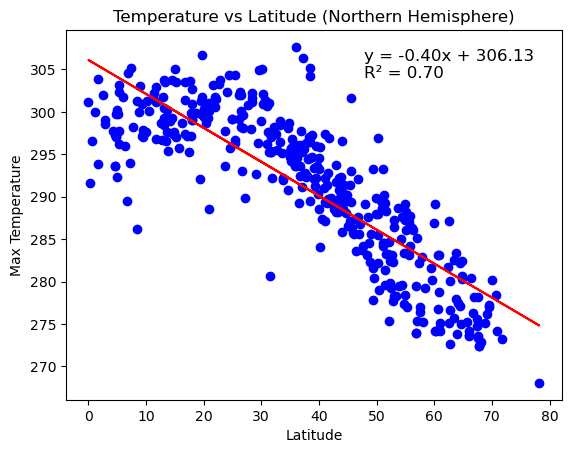

The r^2-value is: 0.69944


In [53]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Temperature vs Latitude (Northern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(0.60, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

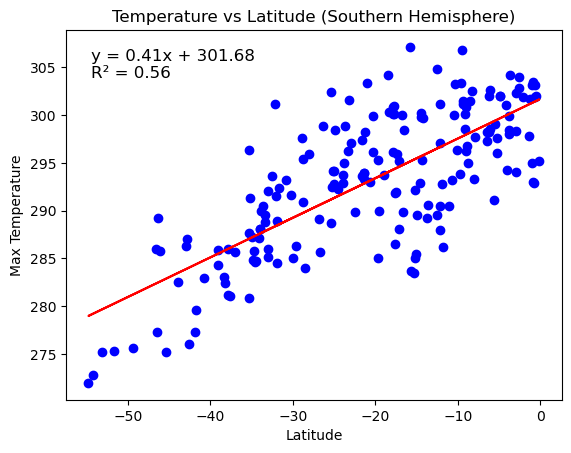

The r^2-value is: 0.56359


In [52]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Temperature vs Latitude (Southern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(0.05, 0.95, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Northern heim
Lower lat has a higher temp, and high lat has a lower temp.
The r^2-value is: 0.69944
Since this coeffienct (0.70 rounded) is high, we can assume that this prediction is fairly accurate.


Southern heim
lower lat has low temp, higher lat in this case up to 0 lat has higher temp.
r^2-value is: 0.56359
Since this coeffienct (0.56) is moderate, we should assume that only half of the data can be accuratly explained.

Overall, if you were to go to high in the north or too low in the south, the temp eventually goes down.

### Humidity vs. Latitude Linear Regression Plot

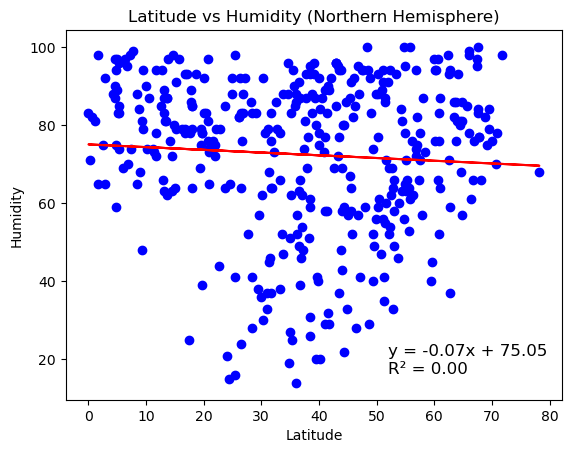

The r^2-value is: 0.00433


In [60]:
# Northern Hemisphere Lat VS Humidity
# YOUR CODE HERE


x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Northern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(0.65, 0.15, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

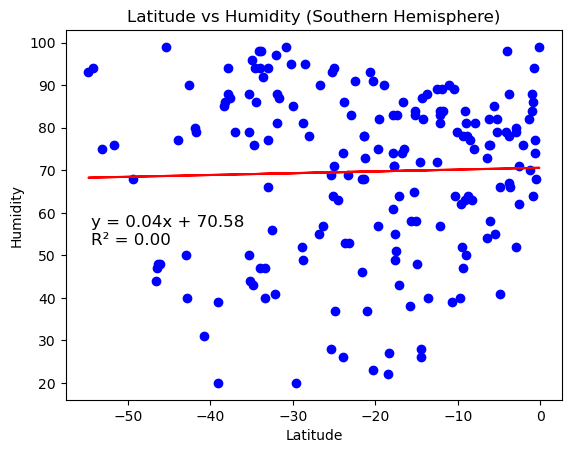

The r^2-value is: 0.00086


In [63]:
# Southern Hemisphere
# YOUR CODE HERE

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Southern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(0.05, 0.5, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both graphs give low values, meaning that they have about 99% of the variance that is not accounted for by the model.

### Cloudiness vs. Latitude Linear Regression Plot

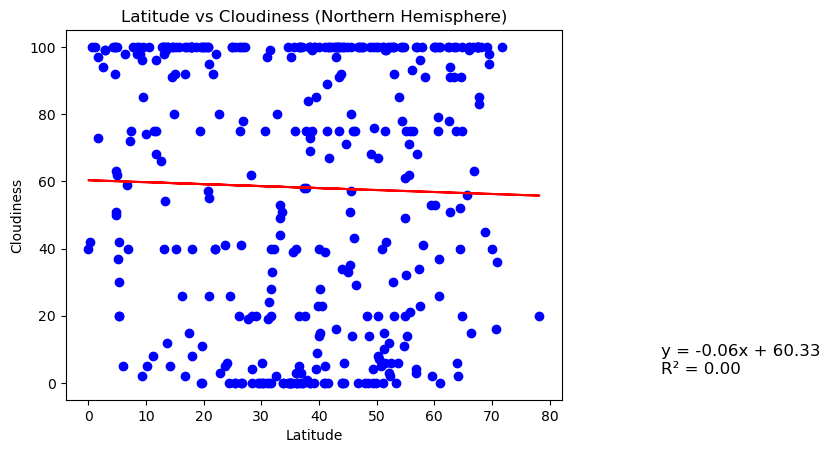

The r^2-value is: 0.00076


In [67]:
# Northern Hemisphere
# YOUR CODE HERE

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness (Northern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(1.2, 0.15, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

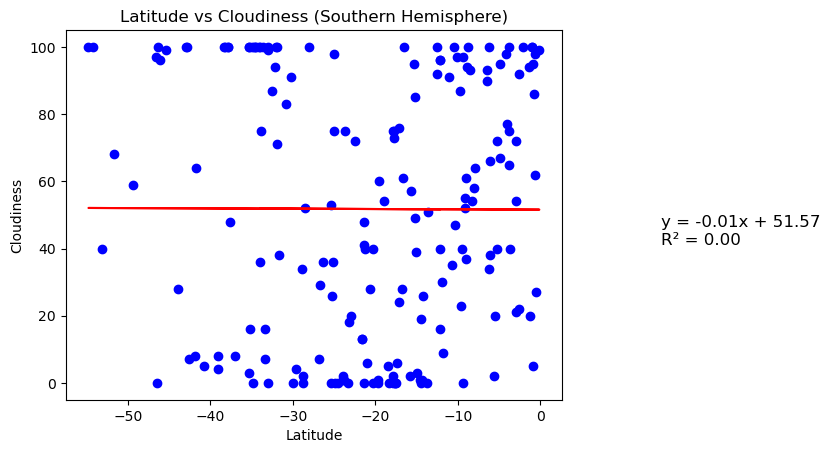

The r^2-value is: 0.00001


In [69]:
# Southern Hemisphere
# YOUR CODE HERE

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness (Southern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(1.2, 0.5, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both graphs give low values, meaning that they have about 99% of the variance that is not accounted for by the model.

### Wind Speed vs. Latitude Linear Regression Plot

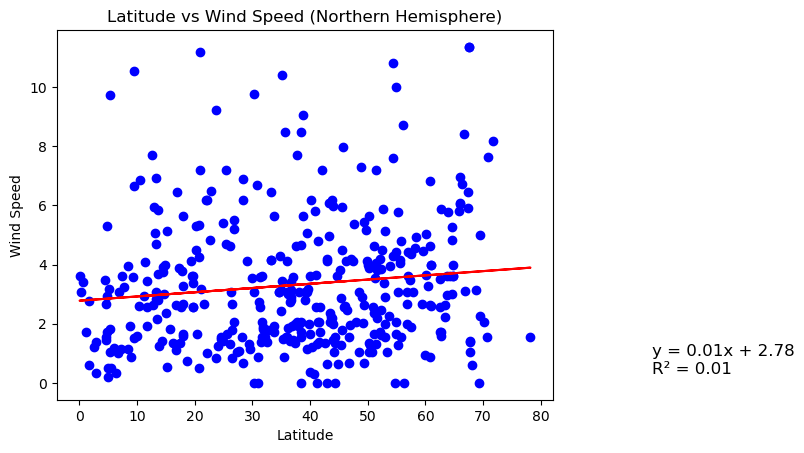

The r^2-value is: 0.01436


In [71]:
# Northern Hemisphere
# YOUR CODE HERE

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (Northern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(1.2, 0.15, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

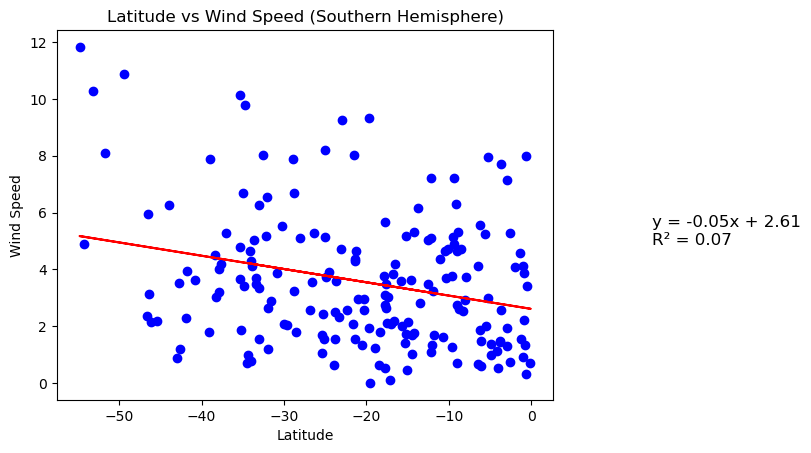

The r^2-value is: 0.07256


In [72]:
# Southern Hemisphere
# YOUR CODE HERE

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create a scatter plot
plt.scatter(x, y, color='blue', label='Data Points')

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the regression line
plt.plot(x, regression_line, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed (Southern Hemisphere)')

# Display the equation and R-squared value on the plot
plt.text(1.2, 0.5, f'y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Show legend
#plt.legend()

# Show the plot
plt.show()
print(f"The r^2-value is: {r_value**2:.5f}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Both graphs give low values, meaning that they have about 99% of the variance that is not accounted for by the model.

We may need to have a bigger sample, to potentially see a trend but right now with the samples at hand we do not get a clear prediction.